In [10]:
#Step 1-3)
from google.colab import drive

In [11]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
%cd /content/drive/'My Drive'/'Colab Notebooks'
%ls

/content/drive/My Drive/Colab Notebooks
 car.data                       homework_1.ipynb   Homework_3.ipynb   tree.png
'Example Decision Tree.ipynb'   Homework_2.ipynb   tree.dot


In [2]:
#Step 4)
import pandas as pd
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety','quality']
car_df = pd.read_csv('car.data', header = None ,names=col_names)

In [3]:
car_df

,buying,maint,doors,persons,lug_boot,safety,quality
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [4]:
car_label=car_df['quality']
car_label

0       unacc
1       unacc
2       unacc
3       unacc
4       unacc
        ...  
1723     good
1724    vgood
1725    unacc
1726     good
1727    vgood
Name: quality, Length: 1728, dtype: object

In [5]:
car_df_new = car_df.copy()
car_df_new['buying'] =pd.Categorical(car_df_new['buying']).codes
car_df_new['maint'] =pd.Categorical(car_df_new['maint']).codes
car_df_new['doors'] =pd.Categorical(car_df_new['doors']).codes
car_df_new['persons'] =pd.Categorical(car_df_new['persons']).codes
car_df_new['lug_boot'] =pd.Categorical(car_df_new['lug_boot']).codes
car_df_new['safety'] =pd.Categorical(car_df_new['safety']).codes
car_df_new['quality'] =pd.Categorical(car_df_new['quality']).codes

In [6]:
car_df_new

,buying,maint,doors,persons,lug_boot,safety,quality
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,3
1725,1,1,3,2,0,1,2
1726,1,1,3,2,0,2,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9046ca3470>,
      dtype=object)

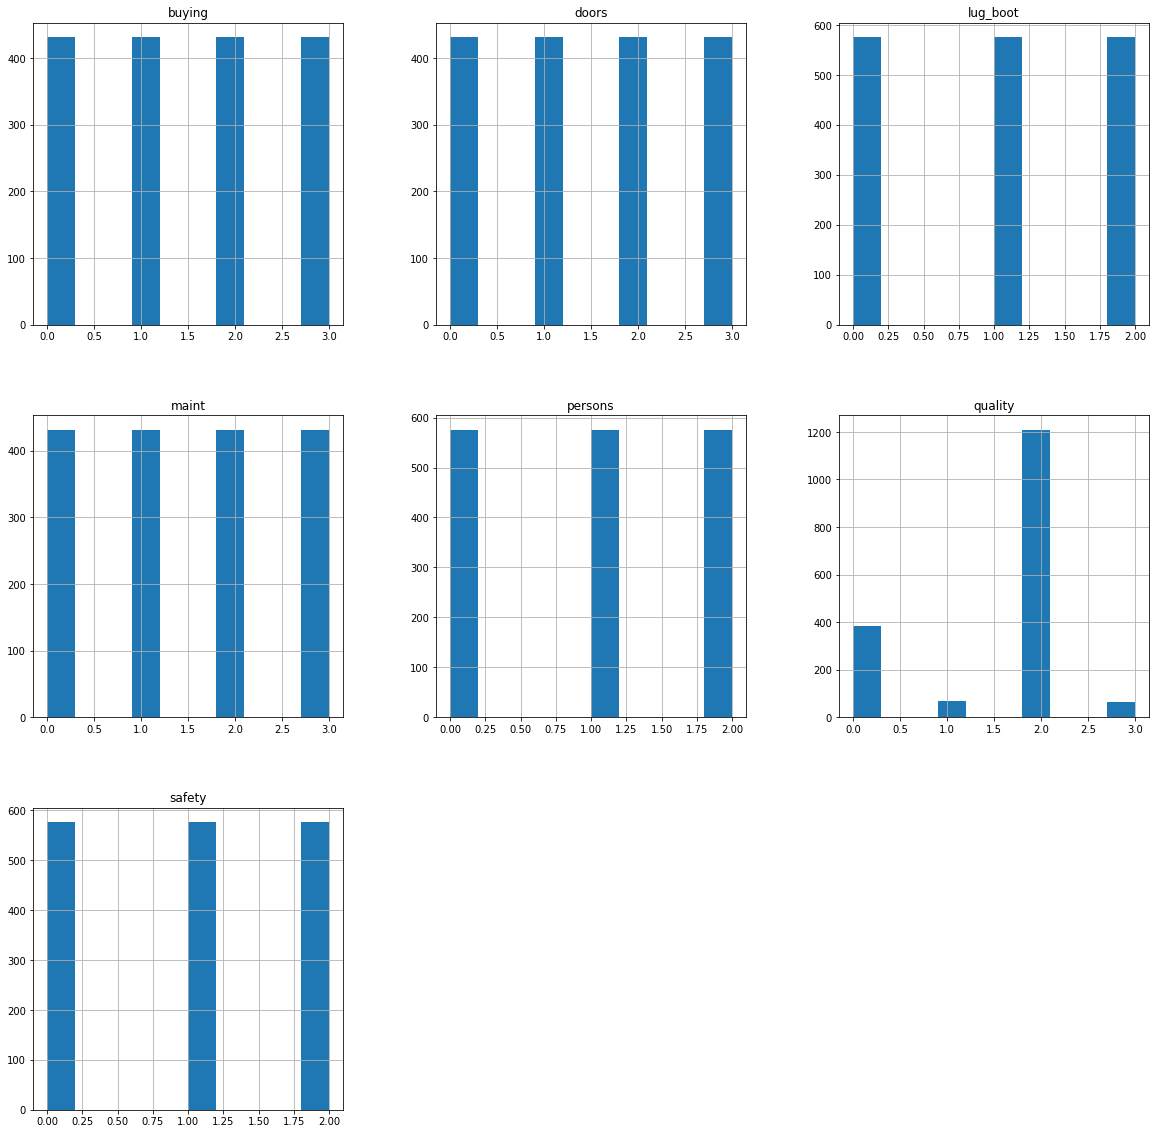

In [7]:
#Step 5)
import matplotlib.pyplot as plt
car_df_new.hist(figsize= (20,20))

In [8]:
#Step 6)
import numpy as np
from sklearn.model_selection import train_test_split
car_train, car_test = train_test_split(car_df_new, random_state = 12)

In [9]:
car_train

,buying,maint,doors,persons,lug_boot,safety,quality
787,0,1,1,0,1,2,2
188,3,0,2,2,0,0,2
1486,1,0,3,0,2,2,2
1110,2,2,1,0,1,1,2
1520,1,2,0,0,0,0,2
...,...,...,...,...,...,...,...
1666,1,1,1,2,2,2,0
1265,2,1,2,2,1,0,3
1277,2,1,3,0,0,0,2
1414,1,0,0,1,2,2,0


In [11]:
#Step 7)
labels=car_train[['quality']].to_numpy()
labels=labels.flatten()
print(labels)

[2 2 2 ... 2 0 3]


In [13]:
import numpy as np
car_class=np.unique(car_label.to_numpy())
print("unique labels: ",car_class)

unique labels:  ['acc' 'good' 'unacc' 'vgood']


In [14]:
features=car_train.drop(['quality'], axis=1)
features_np=features.to_numpy()
print(features_np)

[[0 1 1 0 1 2]
 [3 0 2 2 0 0]
 [1 0 3 0 2 2]
 ...
 [2 1 3 0 0 0]
 [1 0 0 1 2 2]
 [1 1 2 1 0 0]]


In [15]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)
tree_clf.fit(features_np, labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [18]:
car_class

array(['acc', 'good', 'unacc', 'vgood'], dtype=object)

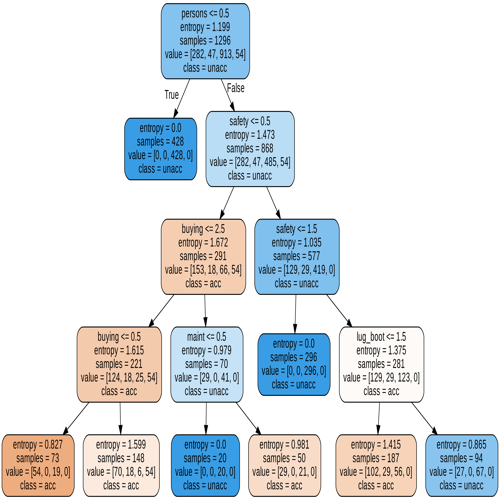

In [20]:
from sklearn.tree import export_graphviz
export_graphviz(tree_clf, out_file='tree.dot',
                feature_names = list(features.columns.values),
                class_names = car_class,
                rounded = True, 
                proportion = False,
                filled = True)
# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])
# Display in jupyter notebook
from PIL import Image
im = Image.open(r'tree.png') 
newsize = (500, 500)
im1 = im.resize(newsize)
# Shows the image in image viewer im1
im1

In [52]:
#Step 8)
from sklearn import metrics
train_pred = tree_clf.predict(features_np)
for x in range(4):
  print("Probality: at ", x, np.count_nonzero(train_pred == x,axis = None)/np.size(train_pred))
features=car_test.drop(['quality'], axis=1)
features_np2=features.to_numpy()
print()
labels2=car_test[['quality']].to_numpy()
labels2=labels2.flatten()
print(labels2)
test_pred = tree_clf.predict(features_np2)
for x in range(4):
  print("Probality: at ", x, np.count_nonzero(test_pred == x,axis = None)/np.size(test_pred))


Probality: at  0 0.3533950617283951
Probality: at  1 0.0
Probality: at  2 0.6466049382716049
Probality: at  3 0.0

[2 2 2 ... 2 0 3]
Probality: at  0 0.36574074074074076
Probality: at  1 0.0
Probality: at  2 0.6342592592592593
Probality: at  3 0.0


In [50]:
#Step 9)
from sklearn import metrics
y_pred = tree_clf.predict(features_np)
print("Accuracy:",metrics.accuracy_score(labels, train_pred))

from sklearn.metrics import confusion_matrix
print("Matrix:",metrics.confusion_matrix(labels, train_pred))

from sklearn.metrics import precision_score
print("Precision Score:",precision_score(labels, train_pred, average= 'micro', pos_label= 1))

from sklearn.metrics import recall_score
print("Recall Score:",metrics.recall_score(labels, train_pred,average= 'micro',pos_label = 1))

from sklearn.metrics import f1_score
print("F1 Score:",f1_score(labels, train_pred,average= 'micro',pos_label = 1))

Accuracy: 0.8225308641975309
Matrix: [[255   0  27   0]
 [ 47   0   0   0]
 [102   0 811   0]
 [ 54   0   0   0]]
Precision Score: 0.8225308641975309
Recall Score: 0.8225308641975309
F1 Score: 0.8225308641975309


In [53]:
from sklearn import metrics
y_pred = tree_clf.predict(features_np)
print("Accuracy:",metrics.accuracy_score(labels2, test_pred))

from sklearn.metrics import confusion_matrix
print("Matrix:",metrics.confusion_matrix(labels2, test_pred))

from sklearn.metrics import precision_score
print("Precision Score:",precision_score(labels2, test_pred, average= 'micro', pos_label= 1))

from sklearn.metrics import recall_score
print("Recall Score:",metrics.recall_score(labels2, test_pred,average= 'micro',pos_label = 1))

from sklearn.metrics import f1_score
print("F1 Score:",f1_score(labels2, test_pred,average= 'micro',pos_label = 1))

Accuracy: 0.8333333333333334
Matrix: [[ 94   0   8   0]
 [ 22   0   0   0]
 [ 31   0 266   0]
 [ 11   0   0   0]]
Precision Score: 0.8333333333333334
Recall Score: 0.8333333333333334
F1 Score: 0.8333333333333334


In [55]:
#Step 10)
import numpy as np
from sklearn.model_selection import train_test_split
car_train_new, car_validation = train_test_split(car_train, random_state = 12)

In [71]:
labels_new=car_train_new[['quality']].to_numpy()
labels_new=labels_new.flatten()

features_new=car_train_new.drop(['quality'], axis=1)
features_np_new=features_new.to_numpy()

from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=4)
tree_clf.fit(features_np_new, labels_new)

features_validation=car_validation.drop(['quality'], axis=1)
features_validation=features_validation.to_numpy()

labels_validation = car_validation[['quality']].to_numpy()
labels_validation=labels_validation.flatten() 

from sklearn import metrics
gini_pred = tree_clf.predict(features_validation)
print("Accuracy:",metrics.accuracy_score(labels_validation, gini_pred))

Accuracy: 0.8179012345679012


In [69]:
labels_new2=car_train_new[['quality']].to_numpy()
labels_new2=labels_new2.flatten()

features_new2=car_train_new.drop(['quality'], axis=1)
features_np_new2=features_new2.to_numpy()

from sklearn.tree import DecisionTreeClassifier
tree_clf2 = DecisionTreeClassifier(criterion = "entropy", max_depth=4)
tree_clf2.fit(features_np_new2, labels_new2)

features_validation=car_validation.drop(['quality'], axis=1)
features_validation=features_validation.to_numpy()

labels_validation = car_validation[['quality']].to_numpy()
labels_validation=labels_validation.flatten() 

from sklearn import metrics
entropy_pred = tree_clf.predict(features_validation)
print("Accuracy:",metrics.accuracy_score(labels_validation, entropy_pred))

Accuracy: 0.8179012345679012
